<a href="https://colab.research.google.com/github/parikshithsivakumar/Machine-Learning/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import euclidean

# Load the dataset
df = pd.read_csv('Fast Food Sales.csv')

# Select two classes (e.g., 'Beverage' and 'Food')
class1 = df[df['item_type'] == 'Beverage'][['item_price', 'quantity', 'transaction_amount']]
class2 = df[df['item_type'] == 'Food'][['item_price', 'quantity', 'transaction_amount']]

# Calculate the mean for each class (centroid)
centroid1 = class1.mean(axis=0)
centroid2 = class2.mean(axis=0)

# Calculate the spread (standard deviation) for each class
spread1 = class1.std(axis=0)
spread2 = class2.std(axis=0)

# Calculate the distance between the two centroids
distance_between_centroids = np.linalg.norm(centroid1 - centroid2)

print("Centroid of Class 1 (Beverage):\n", centroid1)
print("\nSpread of Class 1 (Beverage):\n", spread1)
print("\nCentroid of Class 2 (Food):\n", centroid2)
print("\nSpread of Class 2 (Food):\n", spread2)
print("\nEuclidean Distance between Centroids of Class 1 and Class 2:\n", distance_between_centroids)


FileNotFoundError: [Errno 2] No such file or directory: 'Fast Food Sales.csv'

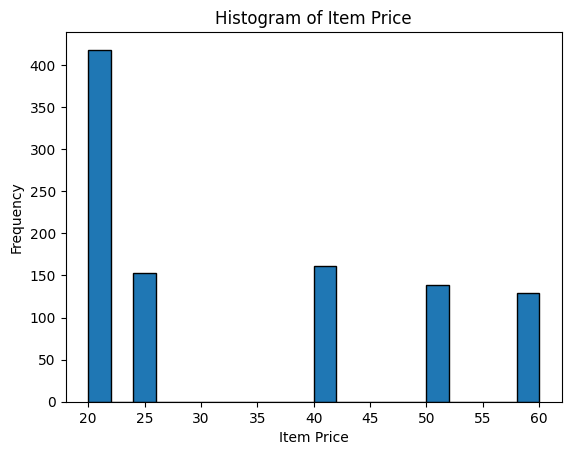

Mean of Item Price: 33.315
Variance of Item Price: 222.43577500000004


In [ ]:
import matplotlib.pyplot as plt

# Choose the feature 'item_price'
feature = df['item_price']

# Plot the histogram
plt.hist(feature, bins=20, edgecolor='black')
plt.title('Histogram of Item Price')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and variance
mean = np.mean(feature)
variance = np.var(feature)

print("Mean of Item Price:", mean)
print("Variance of Item Price:", variance)


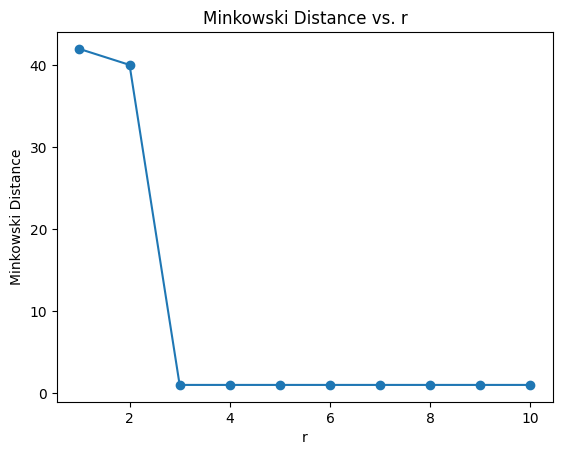

In [ ]:
from scipy.spatial.distance import minkowski

# Select two feature vectors (e.g., first two rows)
vector1 = df.iloc[0][['item_price', 'quantity', 'transaction_amount']].values
vector2 = df.iloc[1][['item_price', 'quantity', 'transaction_amount']].values

# Calculate Minkowski distance for r from 1 to 10
distances = []
r_values = range(1, 11)
for r in r_values:
    distance = minkowski(vector1, vector2, r)
    distances.append(distance)

# Plot the distances
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance vs. r')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('Fast Food Sales.csv')

# Extract features and labels
X = df[['item_price', 'quantity', 'transaction_amount']]
y = df['item_type']

# Check the sizes
print("Features shape:", X.shape)
print("Labels shape:", y.shape)

# Split into train and test sets
if X.shape[0] > 0:  # Ensure there's data to split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print("Training set size:", X_train.shape)
    print("Test set size:", X_test.shape)
else:
    print("Dataset is empty. Check your data loading process.")


Features shape: (1000, 3)
Labels shape: (1000,)
Training set size: (700, 3)
Test set size: (300, 3)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Test the accuracy
accuracy = knn.score(X_test, y_test)
print("Accuracy of kNN classifier (k=3):", accuracy)


Accuracy of kNN classifier (k=3): 1.0


In [ ]:
# Predict the class of the test set
predictions = knn.predict(X_test)

# Print predictions for the test set
print("Predictions for the test set:\n", predictions)


Predictions for the test set:
 ['Fastfood' 'Fastfood' 'Fastfood' 'Fastfood' 'Beverages' 'Fastfood'
 'Beverages' 'Beverages' 'Beverages' 'Beverages' 'Fastfood' 'Beverages'
 'Fastfood' 'Fastfood' 'Fastfood' 'Beverages' 'Fastfood' 'Fastfood'
 'Fastfood' 'Beverages' 'Beverages' 'Fastfood' 'Fastfood' 'Beverages'
 'Fastfood' 'Fastfood' 'Beverages' 'Fastfood' 'Fastfood' 'Fastfood'
 'Fastfood' 'Fastfood' 'Fastfood' 'Fastfood' 'Fastfood' 'Fastfood'
 'Fastfood' 'Fastfood' 'Fastfood' 'Beverages' 'Fastfood' 'Beverages'
 'Beverages' 'Fastfood' 'Fastfood' 'Fastfood' 'Fastfood' 'Fastfood'
 'Fastfood' 'Beverages' 'Beverages' 'Beverages' 'Fastfood' 'Fastfood'
 'Beverages' 'Beverages' 'Fastfood' 'Fastfood' 'Fastfood' 'Fastfood'
 'Fastfood' 'Fastfood' 'Fastfood' 'Beverages' 'Beverages' 'Beverages'
 'Beverages' 'Fastfood' 'Beverages' 'Fastfood' 'Fastfood' 'Beverages'
 'Fastfood' 'Fastfood' 'Fastfood' 'Fastfood' 'Fastfood' 'Fastfood'
 'Fastfood' 'Fastfood' 'Beverages' 'Fastfood' 'Beverages' 'Beverages'
 'F

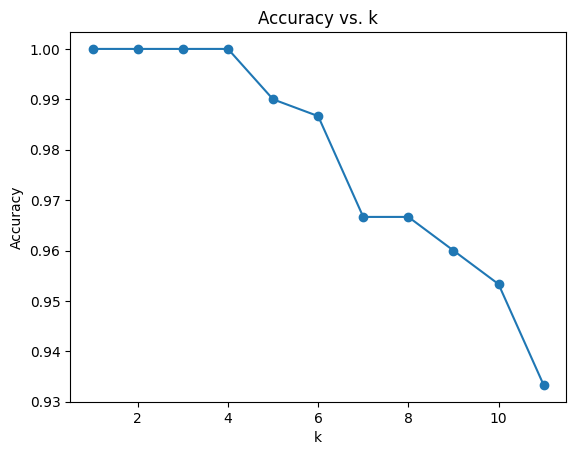

In [ ]:
accuracies = []

# Vary k from 1 to 11
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))

# Plot the accuracies
plt.plot(range(1, 12), accuracies, marker='o')
plt.title('Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[ 71  17]
 [  3 209]]

Classification Report:
               precision    recall  f1-score   support

   Beverages       0.96      0.81      0.88        88
    Fastfood       0.92      0.99      0.95       212

    accuracy                           0.93       300
   macro avg       0.94      0.90      0.92       300
weighted avg       0.93      0.93      0.93       300



In [1]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


NameError: name 'mean_squared_error' is not defined